My DS emu varies much more as a function of *h* than i woud expect. I thought I removed all *h* dependence in my code but its possible is still lingering somewhere. Here I will attempt to Identify such. 

In [72]:
import numpy as np
from glob import glob
from os import path

In [73]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import matplotlib.colors as colors

In [74]:
#from pearce.mocks.kittens import TrainingBox
import pyccl as ccl

In [75]:
h1, h2 = 0.7, 0.7*0.9

In [76]:
omch2 = 0.25/(0.7**2)
ombh2 = 0.05/(0.7**2)
param_dict1 = {'Omega_c': omch2*(h1**2), 'Omega_b': ombh2*(h1**2), 'n_s': 0.96, 'sigma8': 0.8, 'h': h1}
param_dict2 = {'Omega_c': omch2*(h2**2), 'Omega_b': ombh2*(h2**2), 'n_s': 0.96, 'sigma8': 0.8, 'h': h2}

In [77]:
def xi_mm(param_dict):
    if 'omch2' in param_dict: # in other units, convert
        new_param_dict = {}
        new_param_dict['Omega_c'] = param_dict['omch2']*self.h**2
        new_param_dict['Omega_b'] = param_dict['ombh2']*self.h**2
        new_param_dict['n_s'] = param_dict['ns']
        new_param_dict['h'] = self.h
        new_param_dict['A_s'] = np.exp(param_dict['ln10As'])*(np.power(10, -10))

        param_dict = new_param_dict

    elif 'Omega_c' not in param_dict:
        param_dict['Omega_c'] = param_dict['Omega_m'] - param_dict['Omega_b']
        del param_dict['Omega_m']

    cosmo = ccl.Cosmology(**param_dict)

    big_rbins = np.logspace(-1, 1.6, 21)
    big_rpoints = (big_rbins[1:] + big_rbins[:-1]) / 2.0
    big_xi_rmax = big_rpoints[-1]
    return ccl.correlation_3d(cosmo, 1.0, big_rpoints)

In [78]:
xi_mm_7 = xi_mm(param_dict1)
xi_mm_6h = xi_mm(param_dict2)

In [79]:
param_dict1 = {'Omega_c': 0.25, 'Omega_b': 0.05, 'n_s': 0.96, 'sigma8': 0.8, 'h': h1}
param_dict2 = {'Omega_c': 0.25, 'Omega_b': 0.05, 'n_s': 0.96, 'sigma8': 0.8, 'h': h2}

In [80]:
#xi_mm_7 = xi_mm(param_dict1)
xi_mm_6 = xi_mm(param_dict2)

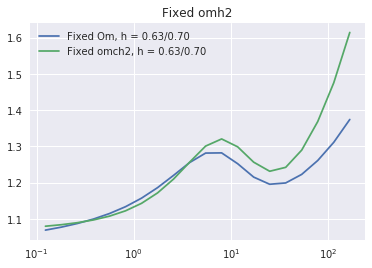

In [81]:
plt.plot(big_rpoints, xi_mm_6/xi_mm_7, label = 'Fixed Om, h = %0.2f/%0.2f'%(h2,h1))
plt.plot(big_rpoints, xi_mm_6h/xi_mm_7, label = 'Fixed omch2, h = %0.2f/%0.2f'%(h2,h1))

plt.legend(loc='best')
plt.xscale('log');
plt.title('Fixed omh2')

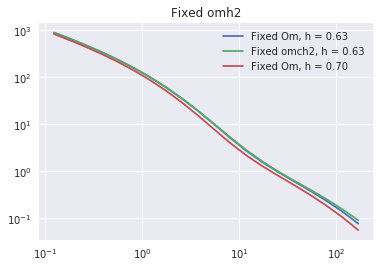

In [82]:
plt.plot(big_rpoints, xi_mm_6, label = 'Fixed Om, h = %0.2f'%h2)
plt.plot(big_rpoints, xi_mm_6h, label = 'Fixed omch2, h = %0.2f'%h2)
plt.plot(big_rpoints, xi_mm_7, label = 'Fixed Om, h = %0.2f'%h1)

plt.legend(loc='best')
#plt.xscale('log');
plt.loglog()
plt.title('Fixed omh2')